In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Customer dataset.csv')
df

,Age,Income,SpendingScore,Savings,Debt
0,58,58159,46,30643,7966
1,48,38986,81,26736,8079
2,34,86858,96,25328,8987
3,62,88776,22,27876,7799
4,27,37666,89,23295,5465
...,...,...,...,...,...
95,63,69262,57,23699,19888
96,27,84581,44,2876,3967
97,43,48776,37,34093,15527
98,30,55080,85,6142,17048


In [3]:
df.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings', 'Debt'], dtype='object')

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [5]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


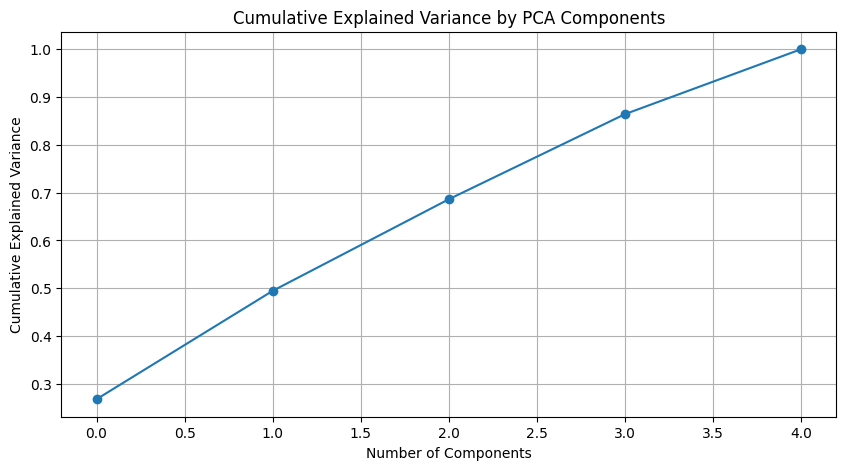

In [6]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


In [7]:
pca = PCA(n_components=2)
pca_final = pca.fit_transform(scaled_data)


In [8]:
df['PC1'] = pca_final[:,0]
df['PC2'] = pca_final[:,1]
df.head()


,Age,Income,SpendingScore,Savings,Debt,PC1,PC2
0,58,58159,46,30643,7966,1.316961,-0.296813
1,48,38986,81,26736,8079,0.366309,-1.484172
2,34,86858,96,25328,8987,-1.029563,-0.002406
3,62,88776,22,27876,7799,1.377368,1.337422
4,27,37666,89,23295,5465,-1.102234,-1.958865


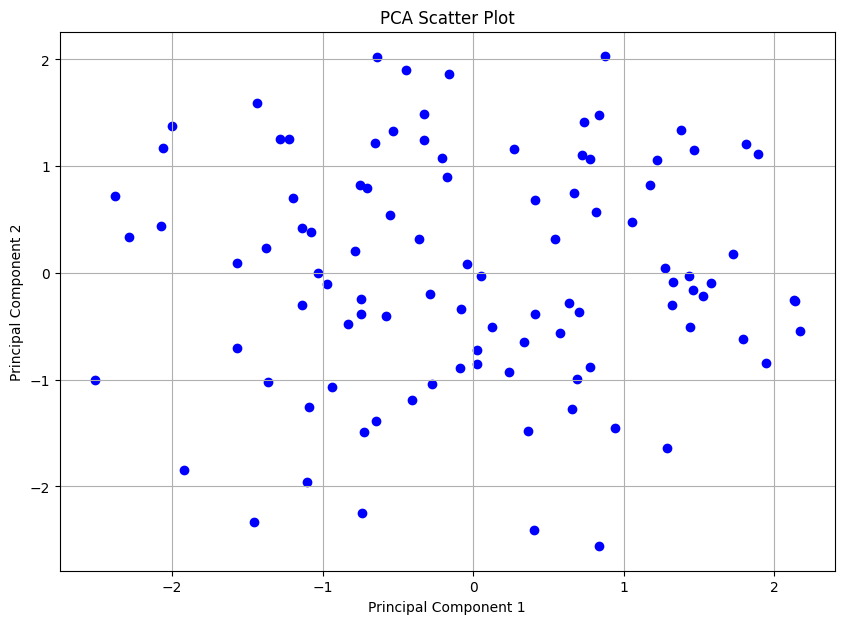

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(df['PC1'], df['PC2'], c='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.grid()
plt.show()


In [10]:
loadings = pd.DataFrame(
    pca.components_,
    columns=df.columns[:-2],  # original features only
    index=['PC1','PC2']
)
loadings


,Age,Income,SpendingScore,Savings,Debt
PC1,0.641420,-0.195645,-0.334337,0.540262,0.382934
PC2,0.150532,0.674970,-0.371406,-0.459031,0.416057


PC1 explained incomes, savings, and spending score.
PC2 explained age and debt.

PC1 captured the highest variance, meaning it represents 
the overall financial ability of a customer.

PC2 separates customers based on age-related behavior.


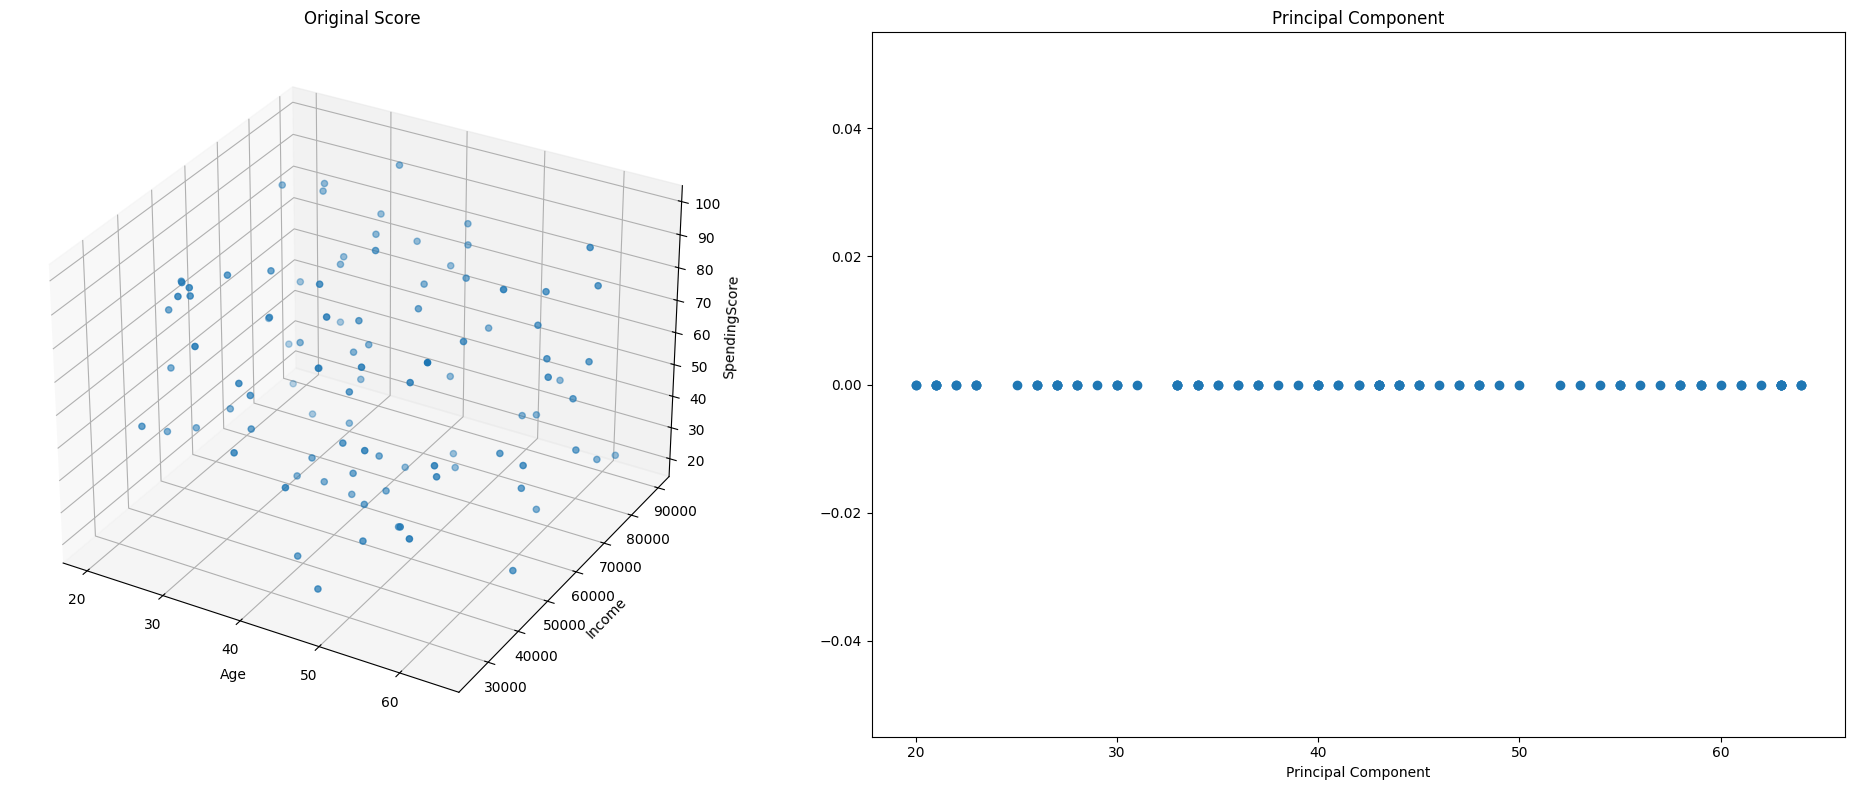

In [13]:
# step 6 , Visualization
Age= df['Age']
Income= df['Income']
Spending_Score= df['SpendingScore']
Debt_Score = df['Debt']

fig = plt.figure(figsize= (20,8))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.scatter(Age,Income,Spending_Score)
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_zlabel('SpendingScore')
ax1.set_title( 'Original Score')
 
# Adding Subplot

ax2 = fig.add_subplot(122)
ax2.scatter(Age, np.zeros_like(Age))
ax2.set_xlabel('Principal Component')
ax2.set_title('Principal Component')
plt.tight_layout()